# Оглавление
1. [Общая информация](#Шаг_1)
2. [Предобработка данных](#Шаг_2)
3. [Подготовка дополнительных признаков](#Шаг_3)
4. [Исследовательский анализ данных](#Шаг_4)
5. [Общий вывод](#Шаг_5)

<a name="Шаг_1"></a>

# Общая информация

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
from pymystem3 import Mystem
m = Mystem()

In [11]:
from collections import Counter

In [12]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [13]:
data.duplicated().sum()

0

In [14]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [16]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [19]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [20]:
description_data = [
['total_images', 'число фотографий квартиры в объявлении'],
['last_price', 'цена на момент снятия с публикации'],
['total_area', 'площадь квартиры в квадратных метрах (м²)'],
['first_day_exposition', 'дата публикации'],
['rooms', 'число комнат'],
['ceiling_height', 'высота потолков (м)'],
['floors_total', 'всего этажей в доме'],
['living_area', 'жилая площадь в квадратных метрах(м²)'],
['floor', 'этаж'],
['is_apartment', 'апартаменты (булев тип)'],
['studio', 'квартира-студия (булев тип)'],
['open_plan', 'свободная планировка (булев тип)'],
['kitchen_area', 'площадь кухни в квадратных метрах (м²)'],
['balcony', 'число балконов'],
['locality_name', 'название населённого пункта'],
['airports_nearest', 'расстояние до ближайшего аэропорта в метрах (м)'],
['cityCenters_nearest', 'расстояние до центра города (м)'],
['parks_around3000', 'число парков в радиусе 3 км'],
['parks_nearest', 'расстояние до ближайшего парка (м)'],
['ponds_around3000', 'число водоёмов в радиусе 3 км'],
['ponds_nearest', 'расстояние до ближайшего водоёма (м)'],
['days_exposition', 'сколько дней было размещено объявление (от публикации до снятия)']
]

In [21]:
description_columns = ['names', 'description']

In [22]:
d = pd.DataFrame(data = description_data, columns = description_columns)

In [23]:
d

,names,description
0,total_images,число фотографий квартиры в объявлении
1,last_price,цена на момент снятия с публикации
2,total_area,площадь квартиры в квадратных метрах (м²)
3,first_day_exposition,дата публикации
4,rooms,число комнат
5,ceiling_height,высота потолков (м)
6,floors_total,всего этажей в доме
7,living_area,жилая площадь в квадратных метрах(м²)
8,floor,этаж
9,is_apartment,апартаменты (булев тип)


Сохранил отдельной таблицей описание. Проще вызывать, чем искать.

In [24]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Название              | Строки                 |     Описание

total_images          | 23699 non-null int64   |  Пропусков нет, категориальная переменная

last_price            | 23699 non-null float64 |  Пропусков нет, количественная переменная, переделать на int64

total_area            | 23699 non-null float64 |  Пропусков нет, количественная переменная

first_day_exposition  | 23699 non-null object  |  Пропусков нет, переделать на нормальную дату

rooms                 | 23699 non-null int64   |  Пропусков нет, категориальная переменная

ceiling_height        | 14504 non-null float64 |  Пропуски есть, количественная переменная

floors_total          | 23613 non-null float64 |  Пропуски есть, категориальная переменная переделать на int64

living_area           | 21796 non-null float64 |  Пропуски есть, количественная переменная

floor                 | 23699 non-null int64   |  Пропусков нет, категориальная переменная

is_apartment          | 2775 non-null object   |  Пропуски есть, переделать на булев тип

studio                | 23699 non-null bool    |  Пропусков нет, булев тип

open_plan             | 23699 non-null bool    |  Пропусков нет, булев тип

kitchen_area          | 21421 non-null float64 |  Пропуски есть, количественная переменная

balcony               | 12180 non-null float64 |  Пропуски есть, категориальная переменная переделать на int64

locality_name         | 23650 non-null object  |  Пропуски есть, объект

airports_nearest      | 18157 non-null float64 |  Пропуски есть, количественная переменная

cityCenters_nearest   | 18180 non-null float64 |  Пропуски есть, количественная переменная

parks_around3000      | 18181 non-null float64 |  Пропуски есть, категориальная переменная переделать на int64

parks_nearest         | 8079 non-null float64  |  Пропуски есть, количественная переменная

ponds_around3000      | 18181 non-null float64 |  Пропуски есть, категориальная переменная переделать на int64

ponds_nearest         | 9110 non-null float64  |  Пропуски есть, количественная переменная

days_exposition       | 20518 non-null float64 |  Пропуски есть, категориальная переменная переделать на int64

### Вывод

В представленных данных много пропусков, у некоторых столбцов стоит изменить тип данных.

<a name="Шаг_2"></a>

### Предобработка данных

In [25]:
d

,names,description
0,total_images,число фотографий квартиры в объявлении
1,last_price,цена на момент снятия с публикации
2,total_area,площадь квартиры в квадратных метрах (м²)
3,first_day_exposition,дата публикации
4,rooms,число комнат
5,ceiling_height,высота потолков (м)
6,floors_total,всего этажей в доме
7,living_area,жилая площадь в квадратных метрах(м²)
8,floor,этаж
9,is_apartment,апартаменты (булев тип)


In [26]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

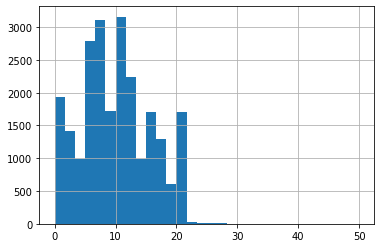

In [27]:
data['total_images'].hist(bins= 30)

Столбец 'total_images' (число фотографий квартиры в объявлении) не имеет искаженных значений. Тип int64. Все устраивает. Максимально 50, минимально 0.

In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [29]:
data['last_price'].max()

763000000.0

In [30]:
data['last_price'] = data['last_price'].astype('int')

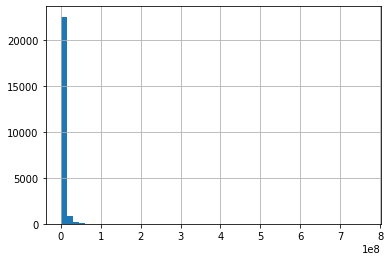

In [31]:
data['last_price'].hist(bins=50)

Столбец 'last_price' (цена на момент снятия с публикации) не имеет искаженных значений. Переделал на Тип int64. В данном случае проще работать с целыми числами, дробные значения считаю незначительными. Все устраивает. Есть выброс. Далее уберу.

In [32]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [33]:
data[data['total_area'] == 900.000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Столбец 'total_area' (площадь квартиры в квадратных метрах (м²)) не имеет искаженных значений. Показалась странной площадь в 900 метров, проверил, похоже на правду. Комнаты в среднем по 75 м. И 467 тысяч за квадрат. Это ваброс, позже уберу.

In [34]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбец 'first_day_exposition' (дата публикации) не имеет искаженных значений. Нормализовал дату.

In [37]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [38]:
(
    data
    .query('rooms==0')
    .pivot_table(index='studio', values='rooms', aggfunc='count')

)

,rooms
studio,
False,59
True,138


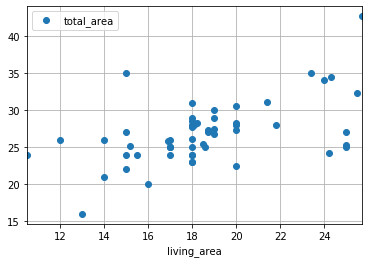

In [39]:
(
    data
    .query('rooms == 0 and studio == False')
    .plot(x = 'living_area', y = 'total_area', style='o', grid = True)
)

In [40]:
data.loc[(data['rooms']==0) & (data['studio'] == False), 'rooms'] = 1

Пустых значений нет. Тип данных устраивает. Есть нулевые значения количесва комнат. 138 из них это квартиры студии. 0 комнат это нормально. В остальных 59 случаях, график соотношения жилой и общей площади. По итогу ставлю единицу. Следует рассмотреть в разрезе общец и жилой площади. (Сократил таблицу)

In [41]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Тип данных устраивает.Пустые значения не меняю.

In [42]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [43]:
data['floors_total'] = data['floors_total'].fillna('0')

In [44]:
data['floors_total'] = data['floors_total'].astype('int')

In [45]:
data['floors_total'].value_counts()

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
0       86
1       25
35      24
28      21
36       3
37       1
34       1
60       1
33       1
52       1
29       1
Name: floors_total, dtype: int64

In [46]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [47]:
data[(data.floors_total == 1) & (data.floor == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3076,20,2000000,80.0,2018-01-03,3,NaN,1,48.5,1,NaN,...,10.0,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.0
4379,5,5300000,58.5,2017-11-15,2,NaN,1,31.6,1,NaN,...,9.4,NaN,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,226.0
5300,5,2990000,60.0,2018-11-15,3,NaN,1,50.0,1,NaN,...,10.0,NaN,поселок станции Вещево,NaN,NaN,NaN,NaN,NaN,NaN,40.0
5698,7,450000,42.0,2017-07-31,2,NaN,1,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
5787,16,9000000,88.0,2018-08-06,3,NaN,1,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0
7962,4,550000,46.2,2018-04-20,3,NaN,1,NaN,1,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8335,10,2700000,80.0,2018-07-07,3,3.00,1,45.0,1,NaN,...,15.0,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,51.0
8388,20,3550000,48.2,2019-03-30,3,2.65,1,33.9,1,NaN,...,9.1,NaN,Сестрорецк,50046.0,31144.0,0.0,NaN,0.0,NaN,NaN
9517,4,1200000,39.4,2018-01-08,2,NaN,1,NaN,1,NaN,...,NaN,NaN,посёлок Гаврилово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9752,16,850000,62.0,2018-11-10,2,NaN,1,31.0,1,NaN,...,11.0,NaN,деревня Сижно,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Минимальное значение 1 (помимо 0) везде это одноэтажные здания.

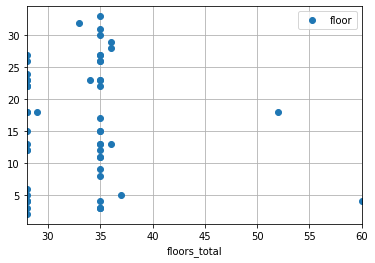

In [48]:
(
    data
    .query('floors_total >=28')
    .plot(x='floors_total', y = 'floor', style='o', grid=True)
)

In [49]:
data['floors_total'] = data['floors_total'].replace(37, 5)

In [50]:
data['floors_total'] = data['floors_total'].replace(60, 5)

In [51]:
data['floors_total'] = data['floors_total'].replace(52, 25)

Считаю такие выбосы неадекватными. Заменил в квартире на 4 и на этаже общее количество на 5, так как скорее всего малоэтажка(маленькач кухня + самое популярное значение) (37,60,52)
Заменил в квартире на 18 этаже общее количество на 25, (самое популярное значение больше 18)
Неверные данные

In [52]:
data.loc[(data['floors_total']==0), 'floors_total'] = data['floor'] - 1

In [53]:
data.loc[(data['floors_total']==0), 'floors_total'] = 1

Нулевые значения поменял на этаж продаваемой квартиры минус 1. Те, что на первом этаже остались в одноэтажном доме.

In [54]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [55]:
data['living_area'] = data['living_area'].fillna('0')

In [56]:
data['living_area'] = data['living_area'].astype('float')

In [57]:
(
    data
    .query('living_area == 0')
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,NaN,14,0.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,0.0,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19,1,NaN,9,0.0,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,0.0,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18,1,NaN,22,0.0,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,0.0,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10,0.0,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9,0.0,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,NaN,9,0.0,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [58]:
data.loc[(data['living_area']==0) & (data['studio'] == True), 'living_area'] = data['total_area']

Для студии будет одинаковая площадь. (балкон опущу)

In [59]:
data['living_area'] = data['living_area'].fillna('0')

In [60]:
data['living_area'] = data['living_area'].astype('float')

In [61]:
data.loc[(data['living_area']==0), 'living_area'] = data['total_area'] - data['kitchen_area'].median()

Для остальных вычел медиану кухни из общей площади

In [62]:
data['living_area'] = data['living_area'].fillna('0')

In [63]:
data['living_area'] = data['living_area'].astype('float')

In [64]:
(
    data
    .query('living_area == 0')
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

Обнулил значения жилой площади. Студии заменид на общую площадь. Балкон в игнор. Заменил на значение общей пощади каждой квартиры минус медиана площадей кухни. float64 устраивает.

In [66]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

Пропусков нет. Тип int64. Устраивает. Смотрю тип по info()

In [68]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [69]:
data['is_apartment'] = data['is_apartment'].fillna('0')

In [70]:
data['is_apartment'].value_counts()

0        20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [71]:
data.loc[(data['is_apartment']=='0'), 'is_apartment'] = False

In [72]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [73]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски переделал на 0. Потом на False. Тип bool. Смотрю тип по info()

In [74]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [75]:
data['studio'].describe()

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Пропусков нет. Тип bool. Смотрю тип по info()

In [77]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [78]:
data['open_plan'].describe()

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Пропусков нет. Тип bool. Смотрю тип по info()

In [80]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [81]:
data['kitchen_area'] = data['kitchen_area'].fillna('0')

In [82]:
data['kitchen_area'] = data['kitchen_area'].astype('float')

In [83]:
data.loc[(data['kitchen_area']==0) & (data['studio']!=True), 'kitchen_area'] = data['total_area'] - data['living_area']

In [84]:
data['kitchen_area'] = data['kitchen_area'].fillna('0')

In [85]:
data['kitchen_area'] = data['kitchen_area'].astype('float')

In [86]:
(
    data
    .query('kitchen_area == 0 and studio != True')
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9861,10,2350000,25.0,2017-12-03,1,NaN,22,25.0,17,False,...,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0
12691,1,3700000,24.2,2017-11-10,1,NaN,19,24.2,13,False,...,0.0,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0


In [87]:
data.loc[(data['kitchen_area']==0) & (data['studio']!=True), 'studio'] = True

По эти двум квартирам счиаю что это студии. Слишком малая площадь. Меняю студию на True, кухню 0 оставляю.

Пропуски заменил на 0. Привел тип данных к float. Нулевые значения заменил на разницу между общей площадью и жилой.

In [88]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Пустые значения менять на нули не буду. Меняется сразу среднее и медиана. float64 устроит

In [89]:
data['locality_name'].value_counts()

Санкт-Петербург                        15721
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
деревня Пчева                              1
поселок Цвылёво                            1
деревня Рапполово                          1
деревня Котлы                              1
поселок городского типа Кондратьево        1
Name: locality_name, Length: 364, dtype: int64

In [90]:
def lammatiz(df):
    count = []
    for row in df:
        lemmas = m.lemmatize(row)
        count += lemmas
    return count

In [91]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [92]:
df = data['locality_name']

In [93]:
count_locality_name = lammatiz(df)

In [94]:
count_locality_name = Counter(count_locality_name)

In [95]:
count_locality_name = dict(count_locality_name)

In [96]:
count_locality_name = list(count_locality_name.items())

In [97]:
columns = ['locality_name', 'count']

In [98]:
count_locality_name = pd.DataFrame(data = count_locality_name, columns = columns)

In [99]:
count_locality_name.head()

,locality_name,count
0,санкт-петербург,15721
1,\n,23699
2,поселок,2660
3,,5221
4,шушар,440


Заменил пустые значения на слово "Неизвестно". Все в таблице.

In [100]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [101]:
(
    data
    .query('airports_nearest != 0')
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,149.90,9,False,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,27.00,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,67.65,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [102]:
(
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')
)

,airports_nearest
locality_name,
Санкт-Петербург,26757.5


In [103]:
data.loc[(data['airports_nearest']==0), 'airports_nearest'] = 26757.5

Тип устаивает. Пустые значения убирать не стал. 0 поменял на медиану по городу.

In [104]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Тип устаивает. Пустые значения убирать не стал.

In [105]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [106]:
data['parks_around3000'] = data['parks_around3000'].fillna('0')

In [107]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

Категориальная переменная. Обнулил и поменял на int. 

In [108]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Тип устаивает. Пустые значения убирать не стал.

In [109]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [110]:
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')

In [111]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Категориальная переменная. Обнулил и поменял на int. 

In [112]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Тип устаивает. Пустые значения убирать не стал.

In [113]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пока ничего менять не буду. Так как это сроки.

Общий вывод

Данные были приведены к нужным типам значений. Пропуски заменил где это уместно на значения медианы (подробнее выше). Некоторые пропуски были просто заменены на 0, так как это категориальная переменная и обозначает наличие чего либо. В некоторых столбцах оставил пропуски. Так как эти данные просто н указаны при заполнение формы. Видимо эти значения не обязательны. При построение графиков следует обратить внимание на эти данные и проверить на сколько они важны.

<a name="Шаг_3"></a>

### Расчет дополнительных признаков

In [114]:
data['price_meter'] = data['last_price'] / data['total_area']

In [115]:
data['price_meter'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_meter, dtype: float64

In [116]:
data['price_meter'] = data['price_meter'].astype('int')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

Добавил столбец с ценой за метр и поменял тип на int64. 

In [118]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [119]:
data['month'] = data['first_day_exposition'].dt.month

In [120]:
data['year'] = data['first_day_exposition'].dt.year

Вынес отдельныи столбцами день, месяц и год публикации. Тип int64

In [121]:
def floor_name(data):
    if data['floor'] == data['floors_total'] and data['floor'] != 1:
        return 'Последний'
    elif data['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'

In [122]:
data['floor_name'] = data.apply(floor_name, axis=1)

In [123]:
data['floor_name'].value_counts()

Другой       17445
Последний     3337
Первый        2917
Name: floor_name, dtype: int64

Сгрупировал по признаку, первый, последний и остальные. Пробовал через .where() не получилось. Если по одному условию меняет нормально, то остальные забивает.

In [124]:
data['living_total'] = data['living_area'] / data['total_area']

In [125]:
data['kitchen_total'] = data['kitchen_area'] / data['total_area']

In [126]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_name,living_total,kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,120370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81.0,82920,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.0,558.0,92785,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,149.90,9,False,...,3,234.0,424.0,408176,4,7,2015,Другой,0.942767,0.057233
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.0,NaN,72490,1,3,2017,Другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,0,NaN,45.0,52542,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,0,NaN,NaN,44091,6,2,2018,Первый,0.523810,0.476190
23697,13,11475000,76.75,2017-03-28,2,3.00,17,67.65,12,False,...,3,196.0,602.0,149511,1,3,2017,Другой,0.881433,0.303583


In [127]:
d.loc[22] = ['price_meter', 'цена за квадратный метр']

In [128]:
d.loc[23] = ['weekday', 'день недели']

In [129]:
d.loc[24] = ['month', 'месяц']

In [130]:
d.loc[25] = ['year', 'год']

In [131]:
d.loc[26] = ['floor_name', 'наименование этажа']

In [132]:
d.loc[27] = ['living_total', 'отшошение жилой к общей площади']

In [133]:
d.loc[28] = ['kitchen_total', 'отшошение кухни к общей площади']

In [134]:
d

,names,description
0,total_images,число фотографий квартиры в объявлении
1,last_price,цена на момент снятия с публикации
2,total_area,площадь квартиры в квадратных метрах (м²)
3,first_day_exposition,дата публикации
4,rooms,число комнат
5,ceiling_height,высота потолков (м)
6,floors_total,всего этажей в доме
7,living_area,жилая площадь в квадратных метрах(м²)
8,floor,этаж
9,is_apartment,апартаменты (булев тип)


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

Два новых столбца, соотношение жилой к обще и кухня к общей.

Общий вывод.

Добавил необходимые столбцы. Привел к нужному типу данных. Проверил на пропуски. Обновил описательную табличку.

<a name="Шаг_4"></a>

### Исследовательский анализ данных

Типичные параметры продаваемых квартир. (площадь, цена, число комнат, высота потолков)

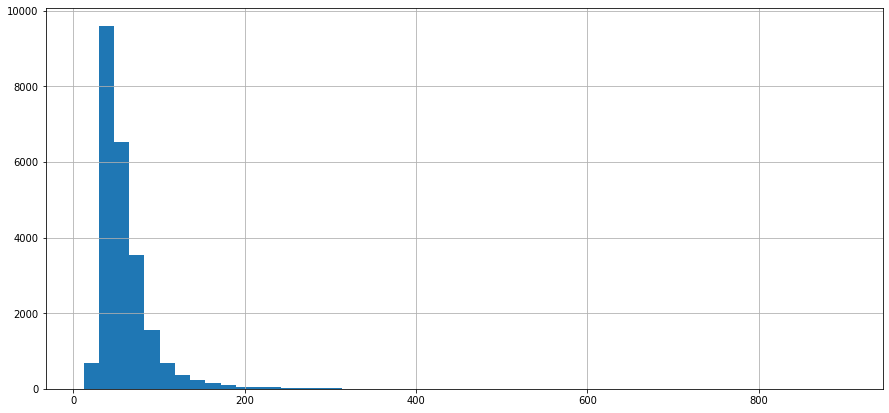

In [136]:
data['total_area'].hist(bins=50, figsize = (15, 7))

При просмотре гистограммы пик виден в районе значения 50 метров кв.

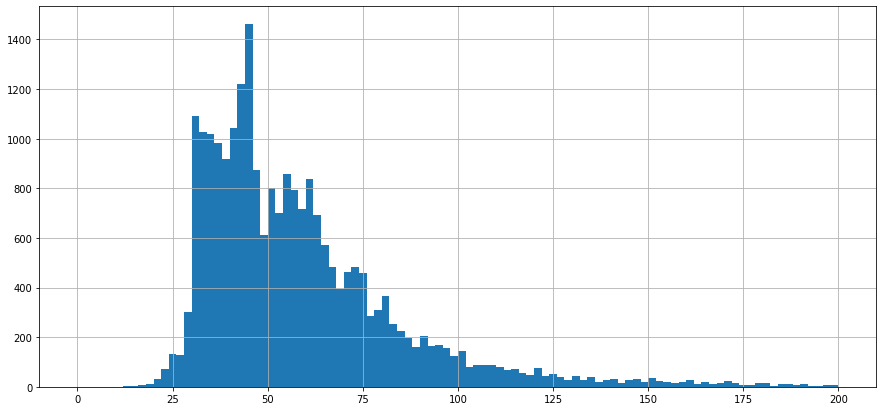

In [137]:
data['total_area'].hist(bins=100, figsize = (15, 7), range = (0, 200))

При более пристальном рассмотрение мы видим, что основные предложения квартир приходятся на площадь от 30 до 110. Остальное можно считать за выбросы. Пик приходится на 40 - 45 метров.

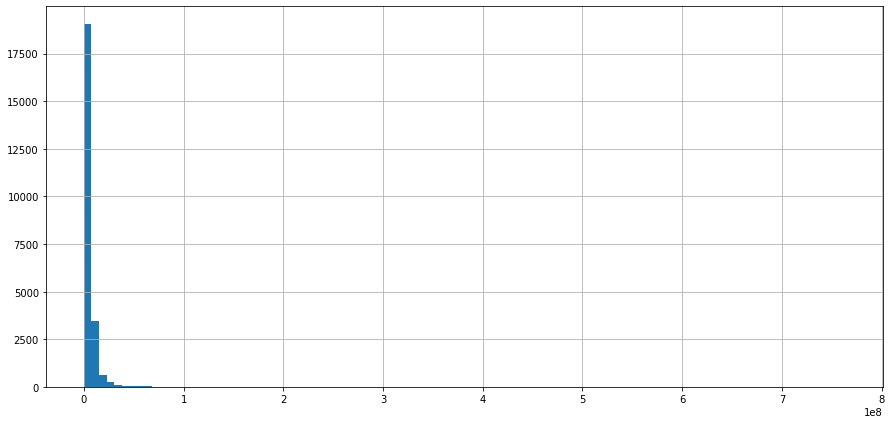

In [138]:
data['last_price'].hist(bins=100, figsize = (15, 7))

Есть выброс, мешающий рассмотреть. 763 млн

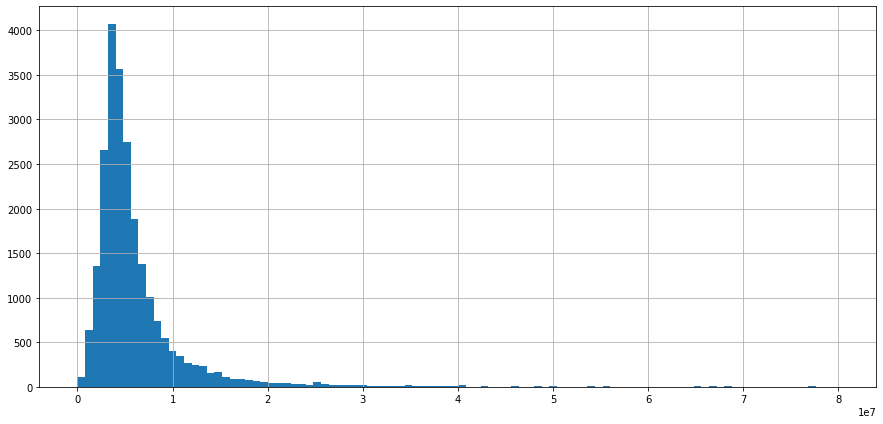

In [139]:
data['last_price'].hist(bins=100, figsize = (15, 7), range = (0, 80000000))

Ограничение да 80 мл. уберу этот хвост

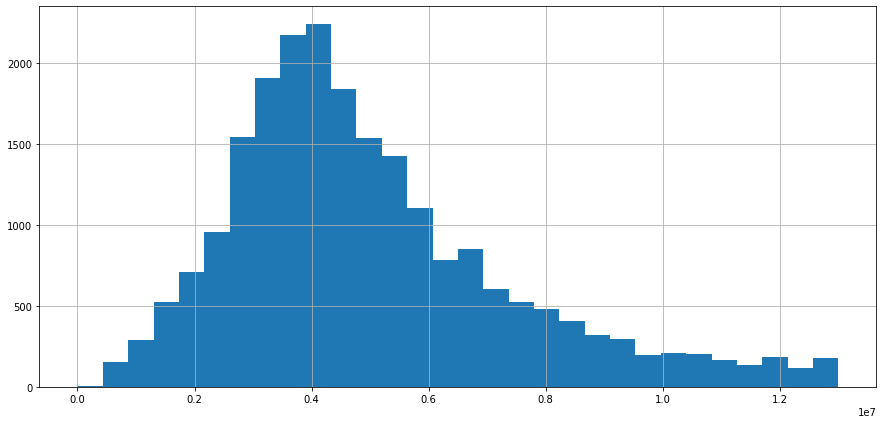

In [140]:
data['last_price'].hist(bins=30, figsize = (15, 7), range = (0, 13000000))

Ограничение до 13 млн. Мы видим нормальное распределение. Пик на  4 - 5 млн.

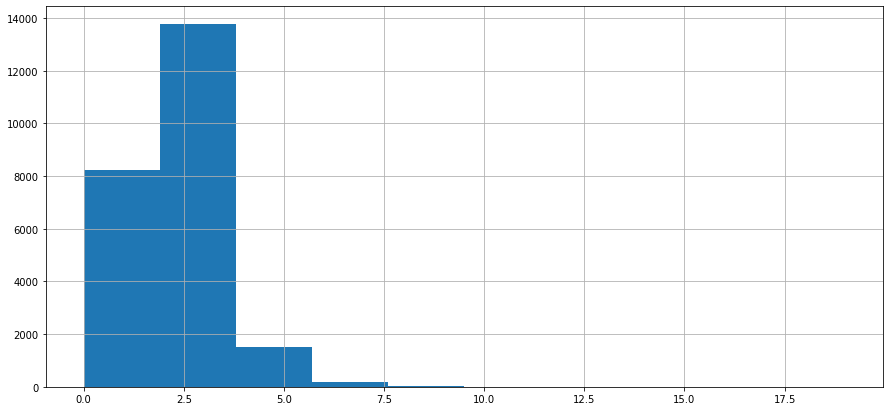

In [141]:
data['rooms'].hist(bins=10, figsize = (15, 7))

Студия редкость. Пик на 1-3 комнаты.

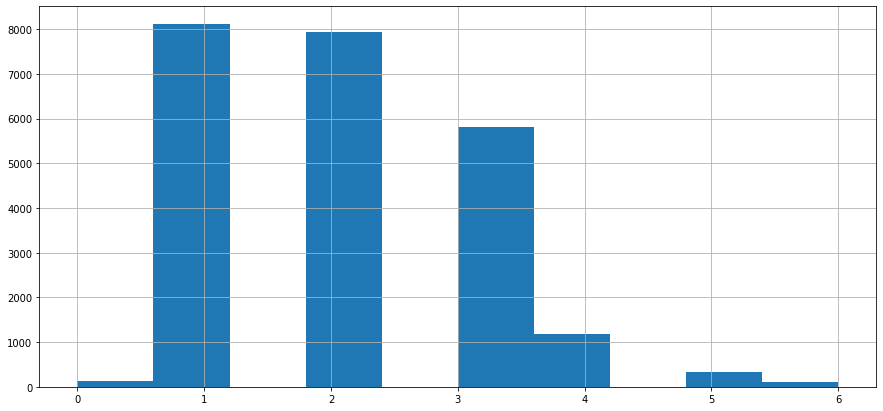

In [142]:
data['rooms'].hist(bins=10, figsize = (15, 7), range = (0, 6))

Оганичение до 6 комнат. Основной диапазон 1 - 3 комнаты, как ранее писал. Самые популярные это однокомнатные квартиры.

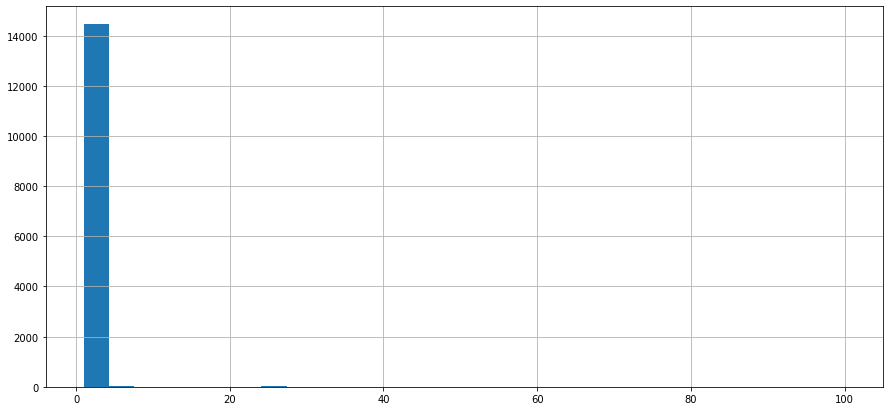

In [143]:
data['ceiling_height'].hist(bins=30, figsize = (15, 7))

ничего не понятно. Есть выбросы. Ограничусь 5

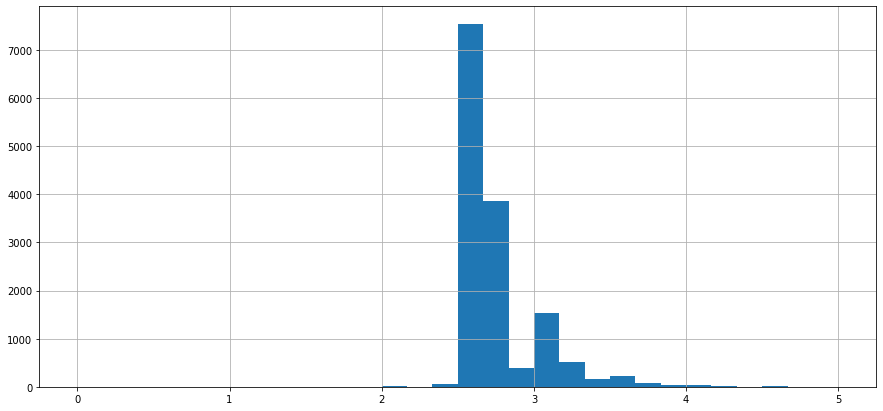

In [144]:
data['ceiling_height'].hist(bins=30, figsize = (15, 7), range = (0, 5))

Лучше, уберу выбросы.

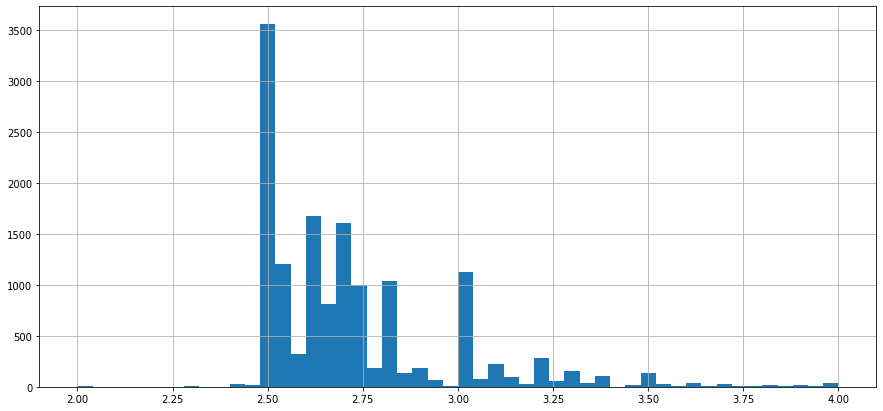

In [145]:
data['ceiling_height'].hist(bins=50, figsize = (15, 7), range = (2, 4))

Ограничение от 2х до 4х. Пик на 2,5. Основные показатели варьируются от 2,40 до 3,25. Дальше считаю редкостью.

Общий ответ

В итоге после изучения основных показателей квартир (площадь, цена, число комнат, высота потолков (есть пропуски)) мы видим, что в каждом параметре писутствуют выбросы, которые меняют общую картину, стоит избегать этих значений.

время продажи квартиры

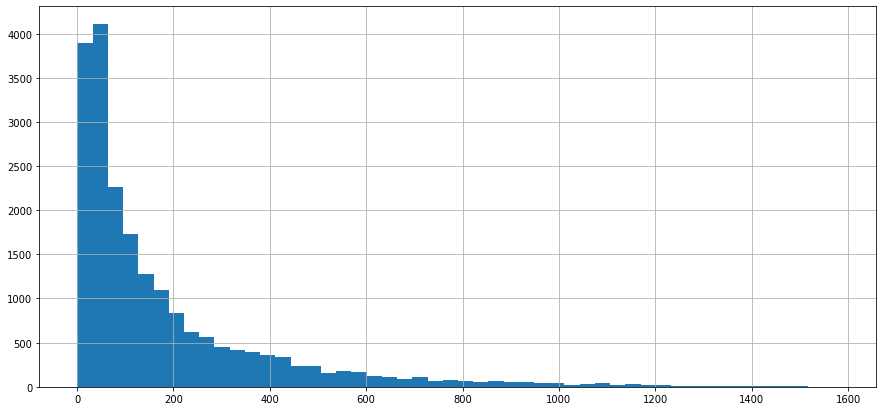

In [146]:
data['days_exposition'].hist(bins=50, figsize = (15, 7))

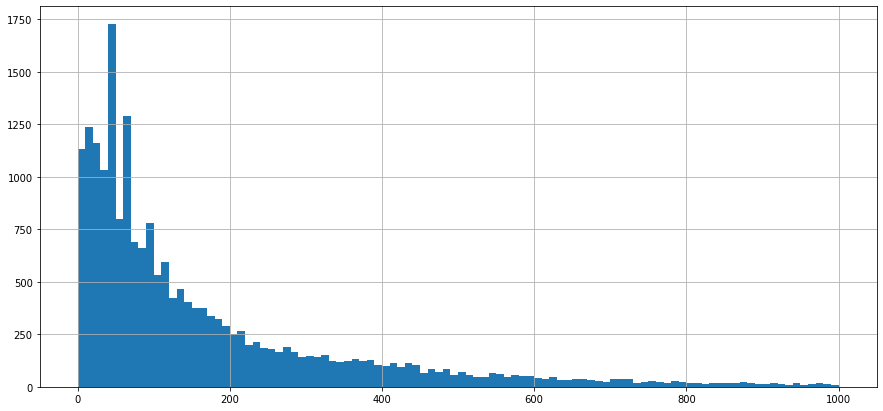

In [147]:
data['days_exposition'].hist(bins=100,  figsize = (15, 7), range = (0, 1000))

In [148]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пик в 30 дней.  Средняя 181 день Медиана 95 дней. Считаю, что при поиске среднего и медианы, надо смотреть в разрезе до 200 дней.

In [149]:
(
    data
    .query('days_exposition < 200')
    .describe()
)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,living_total,kitchen_total
count,14627.000000,1.462700e+04,14627.000000,14627.000000,8380.000000,14627.000000,14627.000000,14627.000000,14627.000000,7919.000000,...,4792.000000,14627.000000,5456.000000,14627.000000,1.462700e+04,14627.000000,14627.000000,14627.000000,14627.000000,14627.000000
mean,9.649689,5.777734e+06,56.147239,1.955220,2.742722,11.062556,33.504983,6.114924,10.219336,1.122490,...,486.936352,0.559171,532.906525,72.548369,9.694004e+04,2.614959,6.672455,2017.518288,0.586034,0.195444
std,5.714700,9.932276e+06,31.032519,1.002242,1.381440,6.654879,21.844244,4.997523,5.821834,1.047687,...,331.589167,0.853061,276.514651,52.168994,4.307098e+04,1.794850,3.484114,0.754940,0.126820,0.083092
min,0.000000,1.219000e+04,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,16.000000,1.000000,1.110000e+02,0.000000,1.000000,2015.000000,0.038462,0.000000
25%,6.000000,3.350000e+06,38.700000,1.000000,2.500000,5.000000,18.500000,3.000000,7.000000,0.000000,...,288.000000,0.000000,319.000000,30.000000,7.692300e+04,1.000000,3.000000,2017.000000,0.500000,0.138067
50%,9.000000,4.400000e+06,49.000000,2.000000,2.640000,9.000000,30.000000,5.000000,9.100000,1.000000,...,453.000000,0.000000,522.000000,60.000000,9.430000e+04,3.000000,7.000000,2018.000000,0.578778,0.180000
75%,14.000000,6.200000e+06,64.700000,3.000000,2.760000,16.000000,41.000000,8.000000,11.200000,2.000000,...,612.000000,1.000000,748.000000,108.000000,1.116560e+05,4.000000,10.000000,2018.000000,0.660000,0.241379
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,36.000000,490.900000,33.000000,150.000000,5.000000,...,3190.000000,3.000000,1344.000000,199.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


в разрезе до 200 дней. Средняя опустилась до 72 дней. Медиана опустилась до 60 дней

Общий вывод.

Обычно продажа занимет в районе двух, двух с половиной месяцев, меньше можно считать быстро, больше долго.
Есть отдельные случаю продажи, которые достигают почти 4.4 года (1580 дней.)

Уберите редкие и выбивающиеся значения

In [150]:
data_normal = data[data['last_price'] <= 13000000]

Как было видно раннее по параметру стоимости, отсек все квартиры стоимостью больше 13 млн.

In [151]:
data_normal = data_normal[data_normal['total_area'] <= 100]

По тому же принцепу убираю выбивающиеся значения площади

In [152]:
data_normal = data_normal[(data_normal['ceiling_height'] <= 4) & (data_normal['ceiling_height'] >= 2)]

По тому же принцепу убираю выбивающиеся значения высоты потолков

In [153]:
data_normal.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,living_total,kitchen_total
count,12911.000000,1.291100e+04,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,6538.000000,...,4280.000000,12911.000000,4767.000000,10898.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000
mean,10.155759,4.995127e+06,53.012052,1.949500,2.680856,10.291147,31.306219,5.631012,9.592725,1.348119,...,474.182944,0.551855,535.916509,179.294274,94610.506390,2.515607,6.316242,2017.539230,0.581523,0.190023
std,5.489486,2.292574e+06,17.106951,0.875038,0.216555,6.182661,13.015028,4.627655,4.217249,1.023637,...,299.451873,0.845869,279.342177,217.863468,30078.962651,1.796688,3.500180,1.005634,0.113227,0.078175
min,0.000000,4.500000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,3.000000,0.000000,16.000000,1.000000,9615.000000,0.000000,1.000000,2014.000000,0.038462,0.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,1.000000,...,288.000000,0.000000,314.000000,44.000000,76923.000000,1.000000,3.000000,2017.000000,0.507854,0.135343
50%,10.000000,4.550000e+06,50.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,1.000000,...,456.000000,0.000000,526.000000,96.000000,94801.000000,2.000000,6.000000,2018.000000,0.580645,0.174603
75%,14.000000,6.100000e+06,64.000000,3.000000,2.750000,14.000000,40.365000,8.000000,11.000000,2.000000,...,604.000000,1.000000,753.000000,229.000000,112309.000000,4.000000,10.000000,2018.000000,0.651932,0.232611
max,35.000000,1.300000e+07,100.000000,6.000000,4.000000,36.000000,90.900000,30.000000,62.200000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,312240.000000,6.000000,12.000000,2019.000000,1.000000,0.803618


In [154]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12911 entries, 4 to 23698
Data columns (total 29 columns):
total_images            12911 non-null int64
last_price              12911 non-null int64
total_area              12911 non-null float64
first_day_exposition    12911 non-null datetime64[ns]
rooms                   12911 non-null int64
ceiling_height          12911 non-null float64
floors_total            12911 non-null int64
living_area             12911 non-null float64
floor                   12911 non-null int64
is_apartment            12911 non-null bool
studio                  12911 non-null bool
open_plan               12911 non-null bool
kitchen_area            12911 non-null float64
balcony                 6538 non-null float64
locality_name           12911 non-null object
airports_nearest        10018 non-null float64
cityCenters_nearest     10029 non-null float64
parks_around3000        12911 non-null int64
parks_nearest           4280 non-null float64
ponds_around300

Итого таблица сократилась почти в два раза.

Какие факторы больше всего влияют на стоимость квартиры

зависит ли цена от квадратного метра

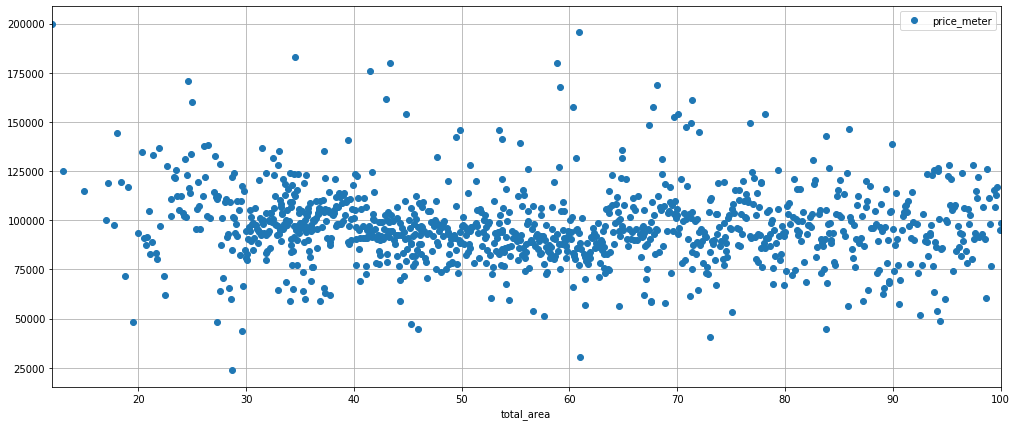

In [155]:
(
    data_normal
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = 'o', grid=True, figsize = (17,7))

)

Стоимость за квадратный метр не зависит от общей площади.

зависит ли цена от количества комнат

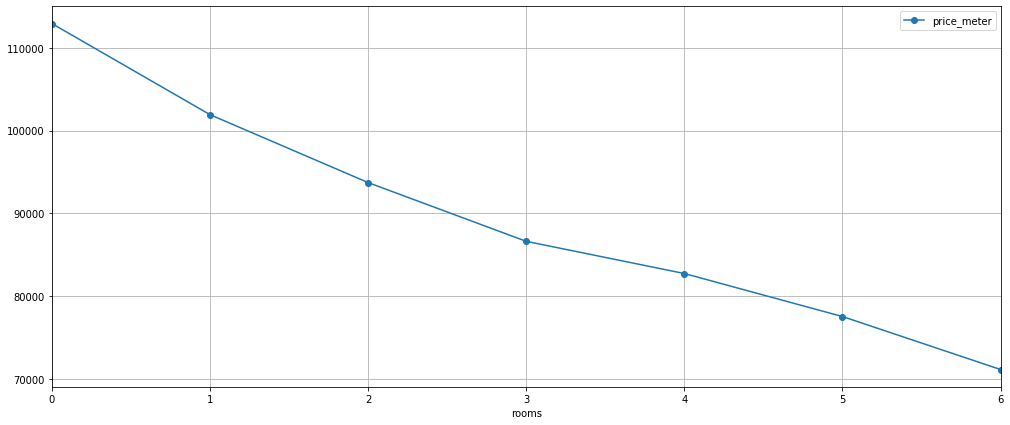

In [156]:
(
    data_normal
    .pivot_table(index = 'rooms', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Стоимость за квадратный метр снижается в зависимости от количества комнат

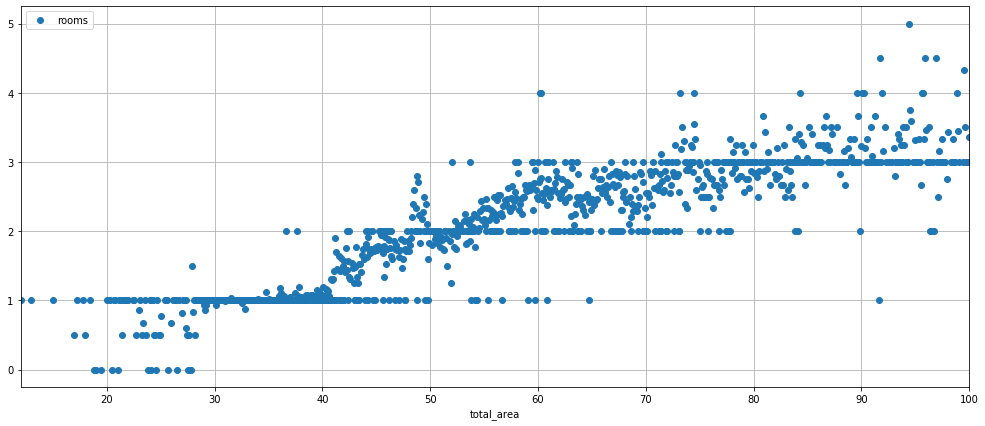

In [157]:
(
    data_normal
    .pivot_table(index = 'total_area', values = 'rooms')
    .plot(style = 'o', grid=True, figsize = (17,7))

)

прост

зависит ли цена от этажа (первого или последнего)

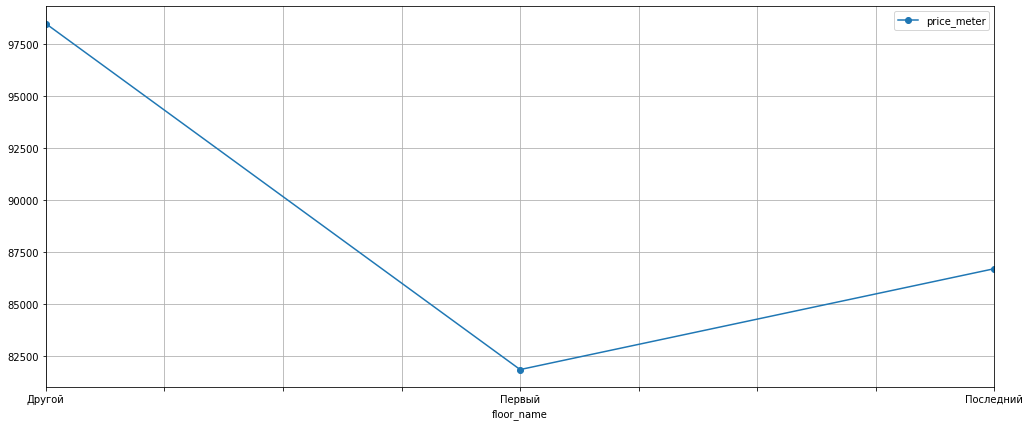

In [158]:
(
    data_normal
    .pivot_table(index = 'floor_name', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))

)

Цена зависит от этажа. Первый самый дешевый. Последний чуть дороже. 

зависит ли цена от удалённости от центра

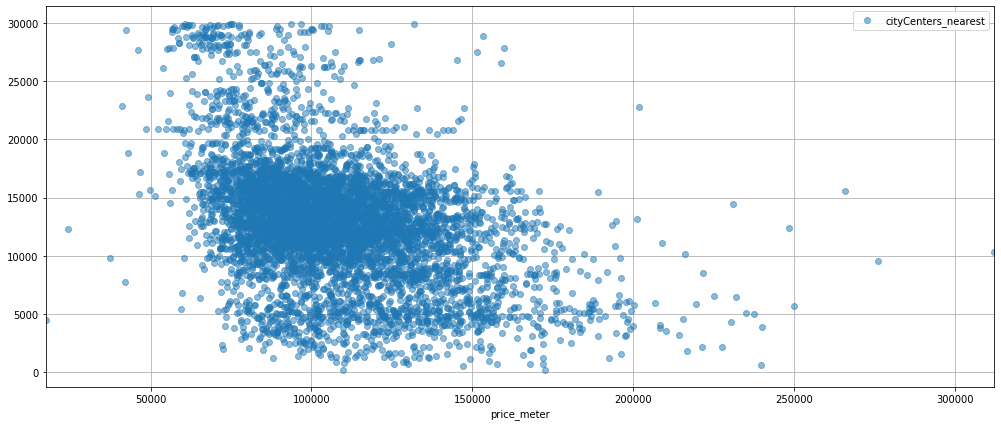

In [159]:
(
    data_normal
    .query('cityCenters_nearest <30000')
    .pivot_table(index = 'price_meter', values = 'cityCenters_nearest')
    .plot(style = 'o', grid=True, figsize = (17,7), alpha=0.5)
)

Стоимость за метр зависит от удаленности от центра. Основной массив предложений от 10 км до 20 км. 

зависимость от даты размещения: дня недели, месяца и года

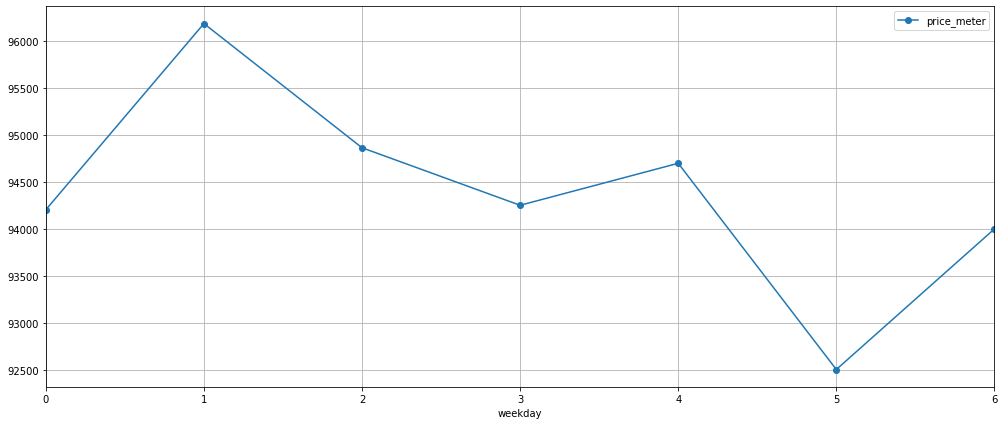

In [160]:
(
    data_normal
    .pivot_table(index = 'weekday', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Разброс есть, но не сильный. Максимальный во вторник, минимальный в субботу

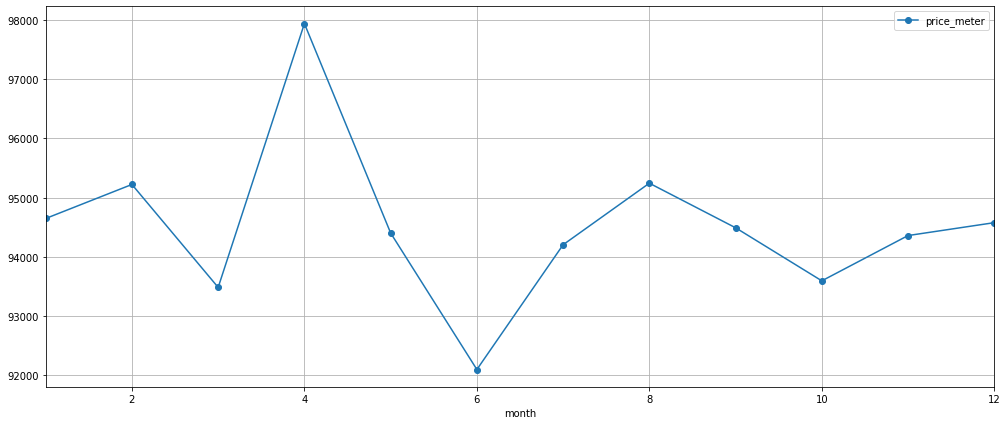

In [161]:
(
    data_normal
    .pivot_table(index = 'month', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Разброс есть, но не сильный. Максимальный в апреле, минимальный в декабре

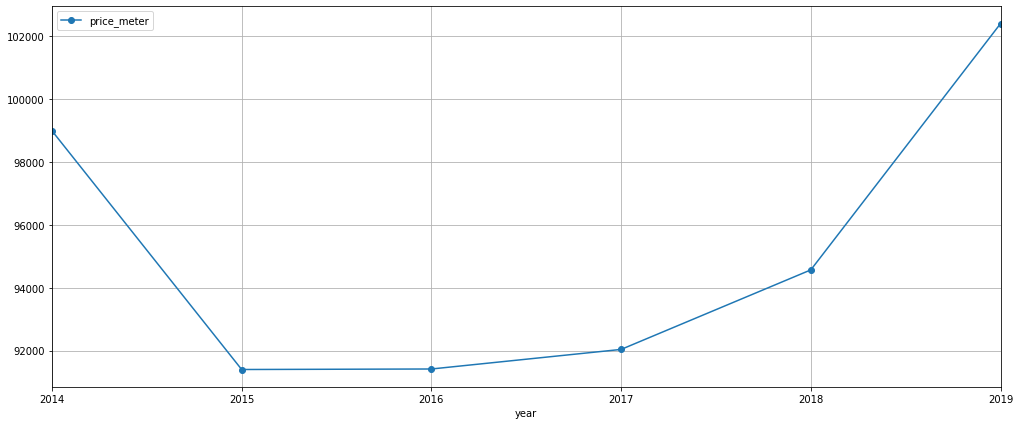

In [162]:
(
    data_normal
    .pivot_table(index = 'year', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

В разрезе годов, мы видим, что в 2014 году цены за метр снизились, потом непрерывно растут.
Видим постепенное увеличение стоимости квадратного метра начиная с 2015 года и резкий скачек в 2018.

Общий вывод.

Как видно на представленных графиках. День и месяц не имеют сильного влияния на стоимость квадратного метра. Зато на длительном периоде в годах, мы видим как падение, так и подорожание метра.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Выберу ранее сохраненную таблицу.

In [163]:
count_locality_name.sort_values(by = 'count', ascending=False).head(16)

,locality_name,count
1,\n,23699
0,санкт-петербург,15721
3,,5221
2,поселок,2660
15,деревня,945
10,муриный,590
5,городской,550
16,кудрово,472
4,шушар,440
39,всеволожск,398


In [164]:
df = data_normal['locality_name']

In [165]:
count_locality_name_data_normal = lammatiz(df)

In [166]:
count_locality_name_data_normal = Counter(count_locality_name_data_normal)

In [167]:
count_locality_name_data_normal = dict(count_locality_name_data_normal)

In [168]:
count_locality_name_data_normal = list(count_locality_name_data_normal.items())

In [169]:
columns = ['locality_name', 'count']

In [170]:
count_locality_name_data_normal = pd.DataFrame(data = count_locality_name_data_normal, columns = columns)

In [171]:
count_locality_name_data_normal.sort_values(by = 'count', ascending=False).head(20)

,locality_name,count
1,\n,12911
0,санкт-петербург,8643
4,,2726
3,поселок,1309
6,деревня,502
9,городской,307
28,всеволожск,266
13,муриный,225
36,шушар,211
8,пушкин,209


In [172]:
data_normal['locality_name'].value_counts().head(11)

Санкт-Петербург      8643
Всеволожск            266
посёлок Шушары        211
Пушкин                209
посёлок Мурино        198
Колпино               198
Гатчина               144
Петергоф              140
посёлок Парголово     136
деревня Кудрово       122
Сестрорецк            112
Name: locality_name, dtype: int64

In [173]:
data_normal['locality_name'].value_counts().head(11).sum()

10379

In [174]:
data_normal_locality_name = [
    'Санкт-Петербург',
    'Всеволожск',
    'посёлок Шушары',
    'Пушкин',
    'Колпино',
    'посёлок Мурино',
    'Гатчина',
    'Петергоф',
    'посёлок Парголово',
    'деревня Кудрово',
    'Сестрорецк',
]

При сравнение трех списков, старого после лемматизации, нового после лемматизации и списка значений столбца (без лемматизации) locality_name, заметно что старый список не актуален. Список значений столбца locality_name и список занчений после лемматизации принципиальных различай в количестве значений на наименование не имеют. Стоит отметить что Санкт-Петербург остался самым востребованным. ПГД, деревни и поселки остались в топах.

Посчитайте среднюю цену квадратного метра в этих населённых пунктах

In [175]:
(
    data_normal
    .query('locality_name == @data_normal_locality_name')
    .pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = ['mean','median'])
)

,mean,median
,price_meter,price_meter
locality_name,,
Всеволожск,67225.184211,65667.0
Гатчина,69823.944444,69399.0
Колпино,75934.833333,74729.0
Петергоф,84785.621429,81968.5
Пушкин,100539.933014,98214.0
Санкт-Петербург,107461.449150,103386.0
Сестрорецк,100852.812500,101288.5
деревня Кудрово,90777.565574,91291.5


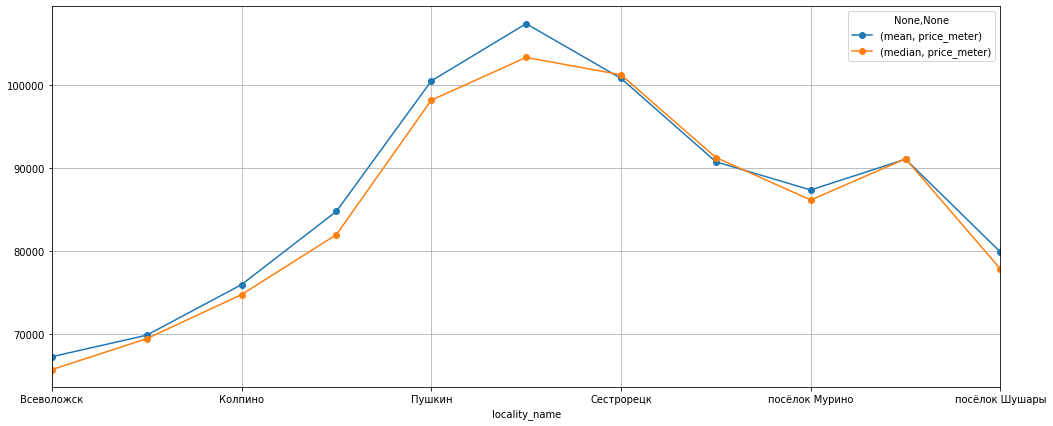

In [176]:
(
    data_normal
    .query('locality_name == @data_normal_locality_name')
    .pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = ['mean','median'])
    .plot(style = '-o', grid=True, figsize = (17,7), )
)

Помимо средней посмотрел и медиану. Различия не существенны

Максимальная цена за метр в городе Санкт-Петербург, минимальная цена в городе Всеволожск

Общий вывод

В пригородах стоимость жилья уменьшается. Самая высокая стоимость в городе Санкт-Петербург, дальше идет Сестрорецк, Пушкин и посёлок Парголово.

как цена зависит от удалённости от центра

In [177]:
data_normal['cityCenters_nearest_km'] = data_normal['cityCenters_nearest'] / 1000

In [178]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12911 entries, 4 to 23698
Data columns (total 30 columns):
total_images              12911 non-null int64
last_price                12911 non-null int64
total_area                12911 non-null float64
first_day_exposition      12911 non-null datetime64[ns]
rooms                     12911 non-null int64
ceiling_height            12911 non-null float64
floors_total              12911 non-null int64
living_area               12911 non-null float64
floor                     12911 non-null int64
is_apartment              12911 non-null bool
studio                    12911 non-null bool
open_plan                 12911 non-null bool
kitchen_area              12911 non-null float64
balcony                   6538 non-null float64
locality_name             12911 non-null object
airports_nearest          10018 non-null float64
cityCenters_nearest       10029 non-null float64
parks_around3000          12911 non-null int64
parks_nearest            

In [179]:
data_normal['cityCenters_nearest_km'] = data_normal['cityCenters_nearest_km'].fillna('0')

In [180]:
data_normal['cityCenters_nearest_km'] = data_normal['cityCenters_nearest_km'].astype('int')

In [181]:
d.loc[29] = ['cityCenters_nearest_km', 'расстояние до центра города (км)']

Есть пустые значения. Переделал их на 0, позже не буду учитывать.

In [182]:
(
    data_normal
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 0')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_meter', aggfunc = 'mean')
)

,price_meter
cityCenters_nearest_km,
1,122127.537500
2,116698.067227
3,116575.074766
4,124390.172840
5,125924.537954
6,118386.975728
7,119894.570707
8,116483.694595
9,108558.783251


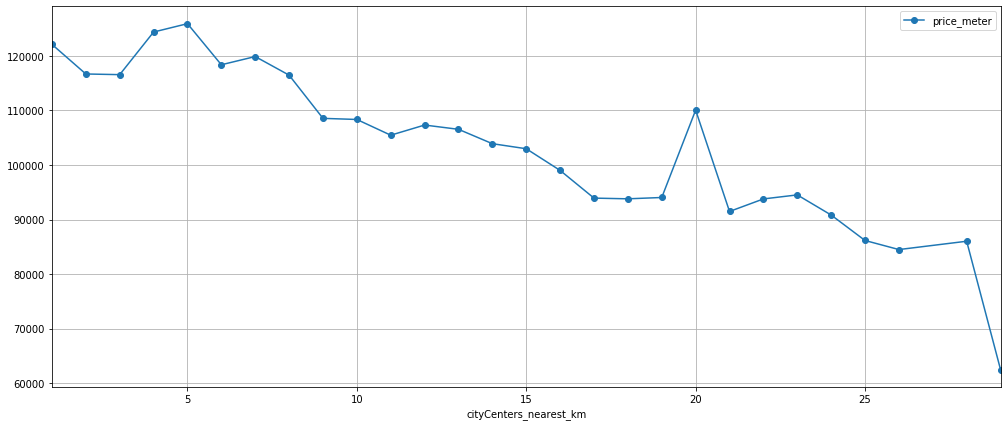

In [183]:
(
    data_normal
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 0')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_meter', aggfunc = 'mean')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Вывод

Центральное кольцо в пределах пяти км. от условного центра

сегмент квартир в центре

In [184]:
data_normal_centr = (
    data_normal
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 0 and cityCenters_nearest_km <= 5')
)

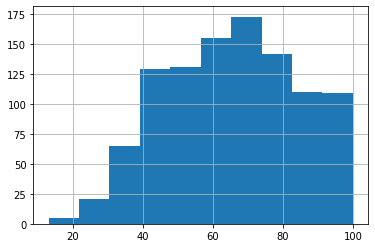

In [185]:
data_normal_centr['total_area'].hist()

Основной диапазон предложений от 42 до 75 метров. Что соответствует двухкомнатной(малогабаритной) и трехкомнатной кварртирам.

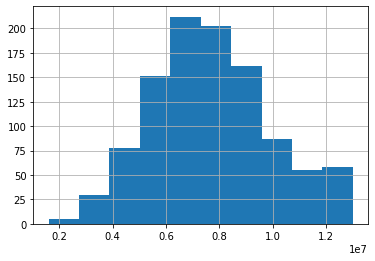

In [186]:
data_normal_centr['last_price'].hist()

Больше всего предложений в диапазонет от 6 до 9 млн.

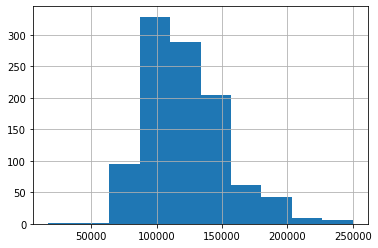

In [187]:
data_normal_centr['price_meter'].hist()

Больше всего предложений в диапазонет от 80 до 160 тысяч за метр.

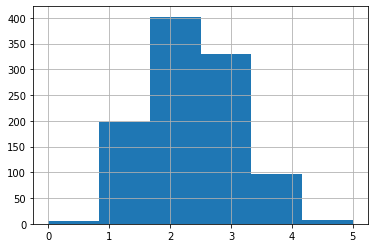

In [188]:
data_normal_centr['rooms'].hist(bins = 6)

Больше всего предложений по двухкомнатным квартирам. Меньше по трешкам, потом однушки и совсем мало студий.

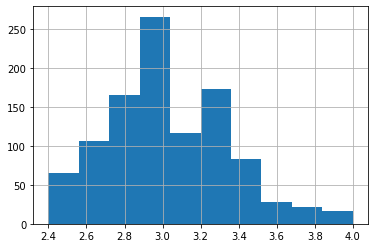

In [189]:
data_normal_centr['ceiling_height'].hist()

In [190]:
data_normal_centr['total_area'].corr(data_normal_centr['price_meter'])

-0.4494960763658931

Цена зависит от общей площади в центре

In [191]:
data_normal_centr['floor'].corr(data_normal_centr['price_meter'])

0.19259247099967952

Влияния этажа на стоимость в центре нет

In [192]:
data_normal_centr['rooms'].corr(data_normal_centr['price_meter'])

-0.4755291716697201

Влияния количества комнат на стоимость в центре есть небольшое

In [193]:
data_normal_centr['cityCenters_nearest_km'].corr(data_normal_centr['price_meter'])

0.09284190166768519

Влияния расстояния до условного центра на стоимость в центральной области нет

In [194]:
data_normal_centr['weekday'].corr(data_normal_centr['price_meter'])

0.015741717763419663

Влияния от даты на стоимость в центре нет

In [195]:
data_normal_centr['month'].corr(data_normal_centr['price_meter'])

-0.021494064769119848

Влияния от даты на стоимость в центре нет

In [196]:
data_normal_centr['year'].corr(data_normal_centr['price_meter'])

0.11174944237112337

Влияния от даты на стоимость в центре нет

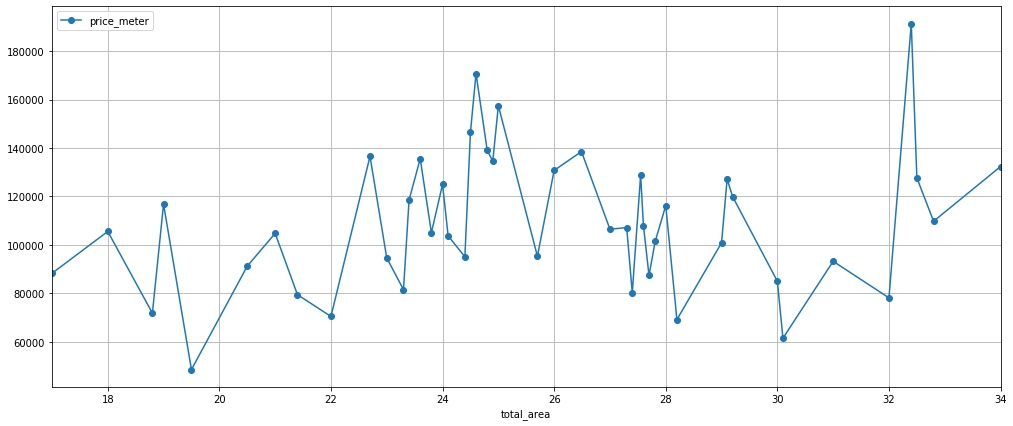

In [197]:
(
    data_normal
    .query('studio == True and total_area <= 35')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

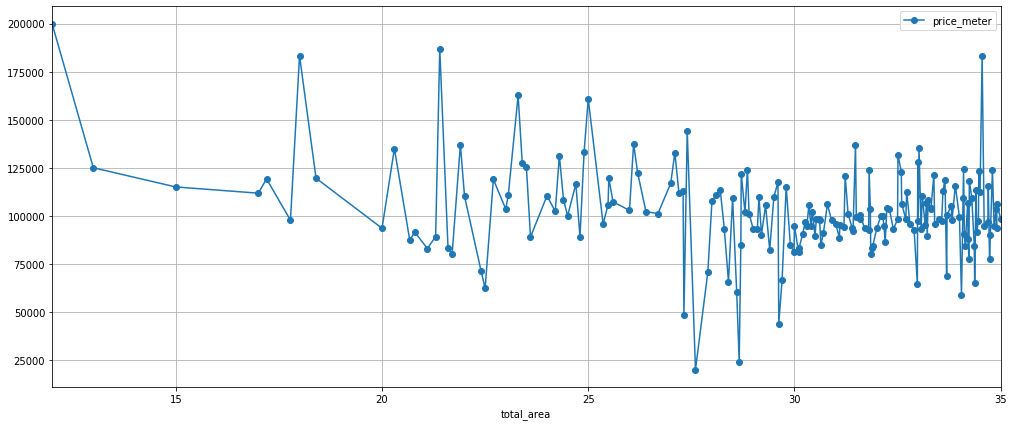

In [198]:
(
    data_normal
    .query('studio == False and total_area <= 35')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Стоимость за метр квадратный не отличается в студии и в квартире с обычной планировкой

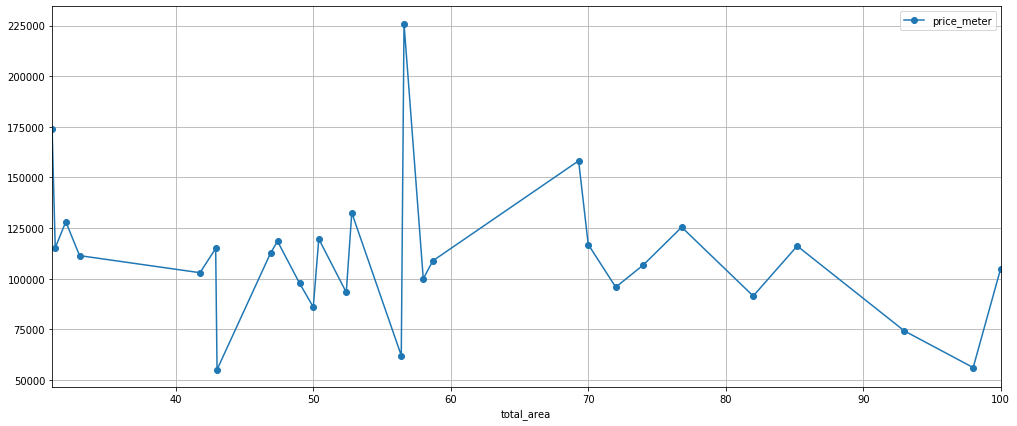

In [199]:
(
    data_normal
    .query('is_apartment == True')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

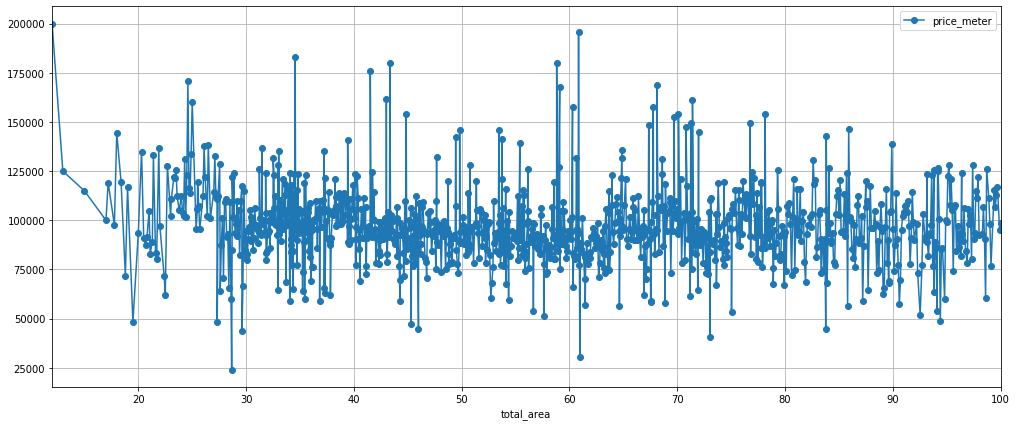

In [200]:
(
    data_normal
    .query('is_apartment == False')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Стоимость за метр квадратный не отличается в аппартаментах и в квартире с обычной планировкой

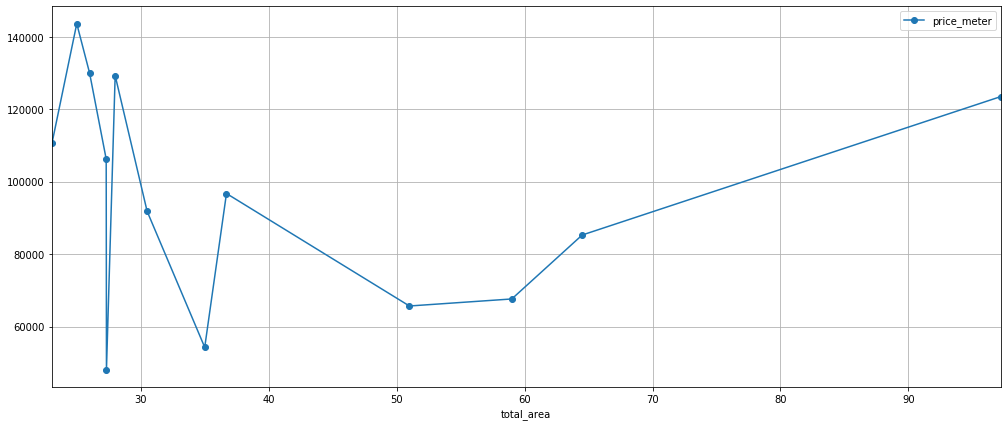

In [201]:
(
    data_normal
    .query('open_plan == True')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

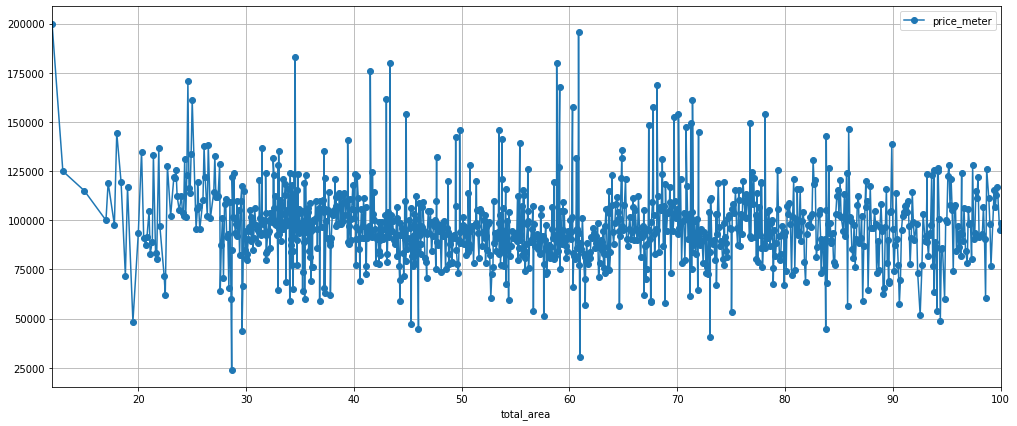

In [202]:
(
    data_normal
    .query('open_plan == False')
    .pivot_table(index = 'total_area', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

Стоимость за метр квадратный не отличается в помещение со свободной планировкой и в квартире с обычной планировкой

In [203]:
d

,names,description
0,total_images,число фотографий квартиры в объявлении
1,last_price,цена на момент снятия с публикации
2,total_area,площадь квартиры в квадратных метрах (м²)
3,first_day_exposition,дата публикации
4,rooms,число комнат
5,ceiling_height,высота потолков (м)
6,floors_total,всего этажей в доме
7,living_area,жилая площадь в квадратных метрах(м²)
8,floor,этаж
9,is_apartment,апартаменты (булев тип)


<a name="Шаг_5"></a>

### Общий вывод

В период с 2014 года по 2015 год произошло снижение стоимости квадратного метра. С 2015 по 2017 год стогнация, потом постепенное увеличение. 

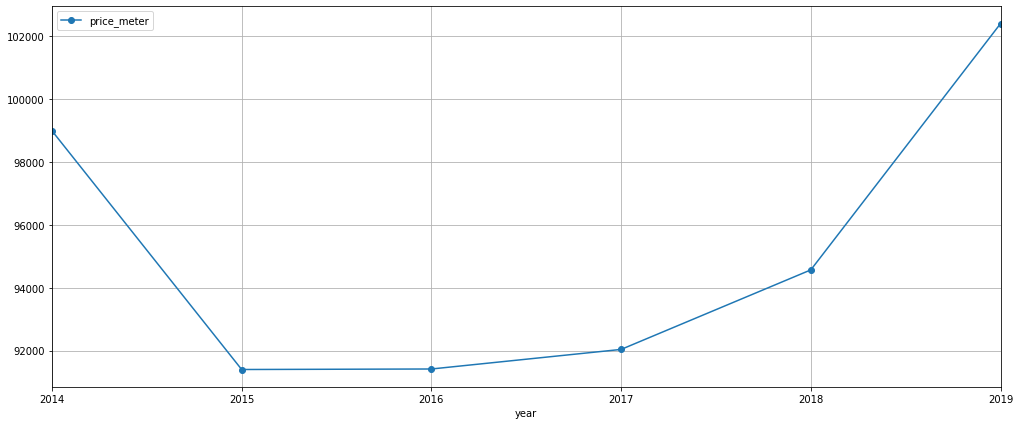

In [205]:
(
    data_normal
    .pivot_table(index = 'year', values = 'price_meter')
    .plot(style = '-o', grid=True, figsize = (17,7))
)

В пригородах стоимость жилья уменьшается. Самая высокая стоимость в городе Санкт-Петербург, дальше идет Сестрорецк, Пушкин и посёлок Парголово

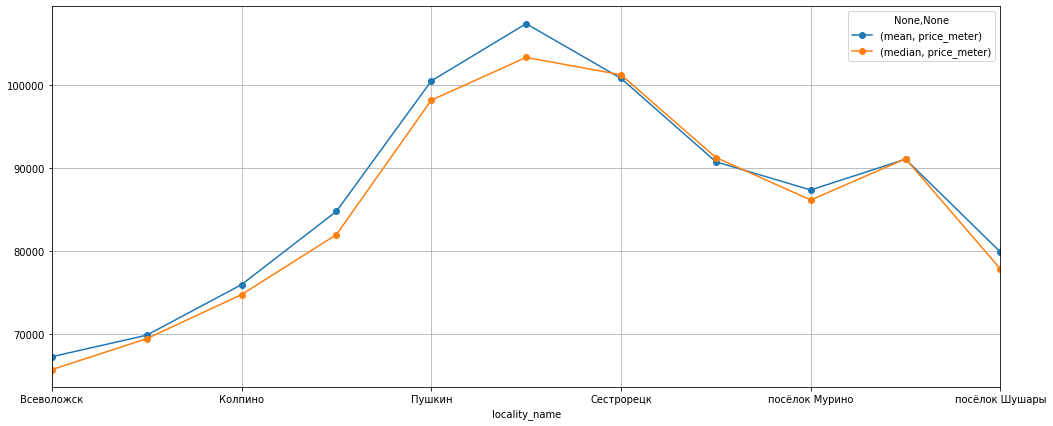

In [206]:
(
    data_normal
    .query('locality_name == @data_normal_locality_name')
    .pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = ['mean','median'])
    .plot(style = '-o', grid=True, figsize = (17,7), )
)

Стоимость квадратного метра не зависит от общей площади квартиры, но в центральной области города Санкт-Петербург стоимость за квадратный метр увеличивается в зависимоти от общей площади квартиры.

Стоимость за квадратный метр снижается в зависимости от количества комнат, влияния количества комнат на стоимость квадратного метра в центральной области города Санкт-Петербург менее выражена.

Прослеживается изменение стоимости в зависимости от этажа. Первый этаж самы дешевый, последний тоже имеет меньший показатеель стоимости в отличае от других этажей. Однако в центральной области такой зависимости нет. Влияния этажа на стоимость в центре нет.

Стоимость квадратного метра зависит от удаления от центра, чем дальше, тем дешевле. Однако в центральной области такого влияния нет.